# COVID-19 Cases Data Vizualisation Notebook
------------------

### Importing Libraries

In [55]:
import pandas as pd #Dataframe manipulation library
import numpy as np #Library to handle data in a vectorized manner
import matplotlib.pyplot as plt #Matplotlib and associated plotting modules
import matplotlib.colors as mcolors
import matplotlib as mpl
from matplotlib import style
import seaborn as sns
import math #Math functions
import requests #library to handle requests
import os
import random
import time
import datetime
import warnings
import plotly.express as px

warnings.filterwarnings("ignore")
print('Libraries imported.')

Libraries imported.


### Importing Dataset

In [56]:
###Import the data from CSSE at Johns Hopkins University (https://systems.jhu.edu/)
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [57]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029


In [58]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38336,38475,38505,38540,38613,39006,39508,39585,39692,40359
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,25876,26381,26898,27426,27831,28121,28752,29249,29799,30276
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,61307,61700,62089,62487,62869,63260,63644,64020,64401,64777
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,6706,6819,6875,6919,6963,6997,7028,7073,7106,7171
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,8990,9194,9266,9345,9518,9592,9695,9729,9729,9729


In [59]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,1995,2011,2025,2030,2047,2067,2082,2096,2117,2126
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1028,1040,1055,1066,1074,1088,1098,1111,1117,1125
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,2623,2631,2640,2647,2659,2666,2675,2687,2696,2705
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,79,79,79,80,80,81,81,82,82,83
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,372,379,382,384,386,387,390,393,393,393


#### Check the shape of the dataframes

In [60]:
confirmed_df.shape

(271, 342)

In [61]:
recoveries_df.shape

(256, 342)

In [62]:
deaths_df.shape

(271, 342)

### Delete the useless columns

In [63]:
confirmed_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
confirmed_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655
1,Albania,0,0,0,0,0,0,0,0,0,...,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827
2,Algeria,0,0,0,0,0,0,0,0,0,...,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007
3,Andorra,0,0,0,0,0,0,0,0,0,...,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699
4,Angola,0,0,0,0,0,0,0,0,0,...,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029


In [64]:
recoveries_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
recoveries_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,38336,38475,38505,38540,38613,39006,39508,39585,39692,40359
1,Albania,0,0,0,0,0,0,0,0,0,...,25876,26381,26898,27426,27831,28121,28752,29249,29799,30276
2,Algeria,0,0,0,0,0,0,0,0,0,...,61307,61700,62089,62487,62869,63260,63644,64020,64401,64777
3,Andorra,0,0,0,0,0,0,0,0,0,...,6706,6819,6875,6919,6963,6997,7028,7073,7106,7171
4,Angola,0,0,0,0,0,0,0,0,0,...,8990,9194,9266,9345,9518,9592,9695,9729,9729,9729


In [65]:
deaths_df.drop(["Province/State","Lat","Long"],axis=1,inplace=True)
deaths_df.head()

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,1995,2011,2025,2030,2047,2067,2082,2096,2117,2126
1,Albania,0,0,0,0,0,0,0,0,0,...,1028,1040,1055,1066,1074,1088,1098,1111,1117,1125
2,Algeria,0,0,0,0,0,0,0,0,0,...,2623,2631,2640,2647,2659,2666,2675,2687,2696,2705
3,Andorra,0,0,0,0,0,0,0,0,0,...,79,79,79,80,80,81,81,82,82,83
4,Angola,0,0,0,0,0,0,0,0,0,...,372,379,382,384,386,387,390,393,393,393


### Aggregate rows by Country

In [66]:
confirmed_df_aggregated = confirmed_df.groupby("Country/Region").sum()
confirmed_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,48952,49161,49378,49621,49681,49817,50013,50190,50433,50655
Albania,0,0,0,0,0,0,0,0,0,0,...,50000,50637,51424,52004,52542,53003,53425,53814,54317,54827
Algeria,0,0,0,0,0,0,0,0,0,0,...,93065,93507,93933,94371,94781,95203,95659,96069,96549,97007
Andorra,0,0,0,0,0,0,0,0,0,0,...,7382,7446,7466,7519,7560,7577,7602,7633,7669,7699
Angola,0,0,0,0,0,0,0,0,0,0,...,16362,16407,16484,16562,16626,16644,16686,16802,16931,17029


In [67]:
recoveries_df_aggregated = recoveries_df.groupby("Country/Region").sum()
recoveries_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,38336,38475,38505,38540,38613,39006,39508,39585,39692,40359
Albania,0,0,0,0,0,0,0,0,0,0,...,25876,26381,26898,27426,27831,28121,28752,29249,29799,30276
Algeria,0,0,0,0,0,0,0,0,0,0,...,61307,61700,62089,62487,62869,63260,63644,64020,64401,64777
Andorra,0,0,0,0,0,0,0,0,0,0,...,6706,6819,6875,6919,6963,6997,7028,7073,7106,7171
Angola,0,0,0,0,0,0,0,0,0,0,...,8990,9194,9266,9345,9518,9592,9695,9729,9729,9729


In [68]:
deaths_df_aggregated = deaths_df.groupby("Country/Region").sum()
deaths_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/15/20,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1995,2011,2025,2030,2047,2067,2082,2096,2117,2126
Albania,0,0,0,0,0,0,0,0,0,0,...,1028,1040,1055,1066,1074,1088,1098,1111,1117,1125
Algeria,0,0,0,0,0,0,0,0,0,0,...,2623,2631,2640,2647,2659,2666,2675,2687,2696,2705
Andorra,0,0,0,0,0,0,0,0,0,0,...,79,79,79,80,80,81,81,82,82,83
Angola,0,0,0,0,0,0,0,0,0,0,...,372,379,382,384,386,387,390,393,393,393


#### Check the shape of the new dataframes

In [69]:
confirmed_df_aggregated.shape

(191, 338)

In [70]:
recoveries_df_aggregated.shape

(191, 338)

In [71]:
deaths_df_aggregated.shape

(191, 338)

### Visualizing Europe confirmed cases

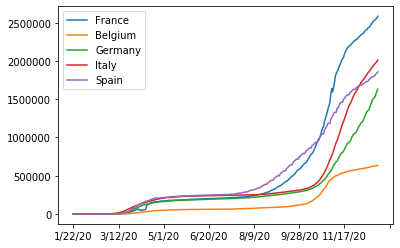

In [72]:
confirmed_df_aggregated.loc ["France"].plot()
confirmed_df_aggregated.loc ["Belgium"].plot()
confirmed_df_aggregated.loc ["Germany"].plot()
confirmed_df_aggregated.loc ["Italy"].plot()
confirmed_df_aggregated.loc ["Spain"].plot()
plt.legend()
plt.savefig("img/confirmed-europe.png")
plt.show()

### Visualizing Europe recoveries cases

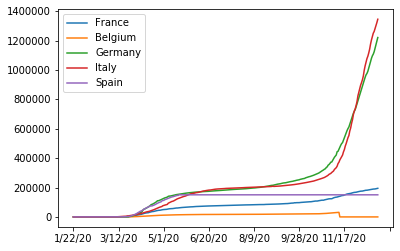

In [73]:
recoveries_df_aggregated.loc ["France"].plot()
recoveries_df_aggregated.loc ["Belgium"].plot()
recoveries_df_aggregated.loc ["Germany"].plot()
recoveries_df_aggregated.loc ["Italy"].plot()
recoveries_df_aggregated.loc ["Spain"].plot()
plt.legend()
plt.savefig("img/recoveries-europe.png")
plt.show()

### Visualizing Europe deaths cases

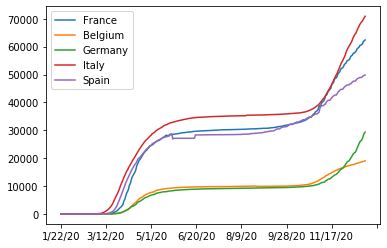

In [74]:
deaths_df_aggregated.loc ["France"].plot()
deaths_df_aggregated.loc ["Belgium"].plot()
deaths_df_aggregated.loc ["Germany"].plot()
deaths_df_aggregated.loc ["Italy"].plot()
deaths_df_aggregated.loc ["Spain"].plot()
plt.legend()
plt.savefig("img/deaths-europe.png")
plt.show()

### Visualizing Asia confirmed cases 

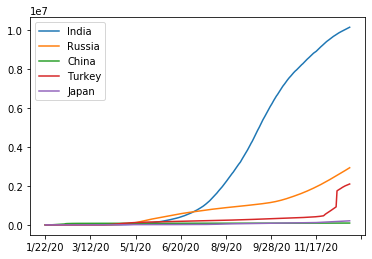

In [75]:
confirmed_df_aggregated.loc ["India"].plot()
confirmed_df_aggregated.loc ["Russia"].plot()
confirmed_df_aggregated.loc ["China"].plot()
confirmed_df_aggregated.loc ["Turkey"].plot()
confirmed_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/confirmed-asia.png')
plt.show()

### Visualizing Asia recoveries cases

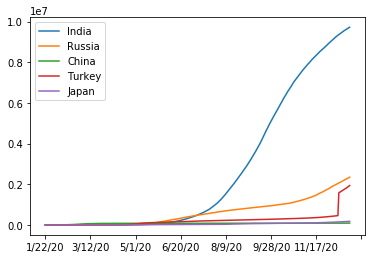

In [76]:
recoveries_df_aggregated.loc ["India"].plot()
recoveries_df_aggregated.loc ["Russia"].plot()
recoveries_df_aggregated.loc ["China"].plot()
recoveries_df_aggregated.loc ["Turkey"].plot()
recoveries_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/recoveries-asia.png')
plt.show()

### Visualizing Asia deaths cases

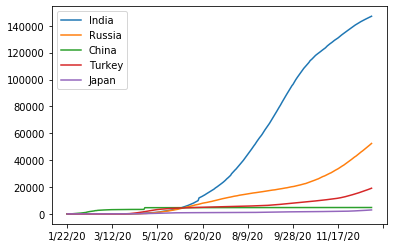

In [77]:
deaths_df_aggregated.loc ["India"].plot()
deaths_df_aggregated.loc ["Russia"].plot()
deaths_df_aggregated.loc ["China"].plot()
deaths_df_aggregated.loc ["Turkey"].plot()
deaths_df_aggregated.loc ["Japan"].plot()
plt.legend()
plt.savefig('img/deaths-asia.png')
plt.show()

### Visualizing Africa confirmed cases

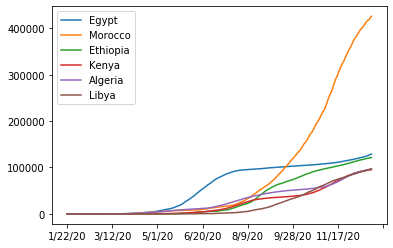

In [78]:
confirmed_df_aggregated.loc ["Egypt"].plot()
confirmed_df_aggregated.loc ["Morocco"].plot()
confirmed_df_aggregated.loc ["Ethiopia"].plot()
confirmed_df_aggregated.loc ["Kenya"].plot()
confirmed_df_aggregated.loc ["Algeria"].plot()
confirmed_df_aggregated.loc ["Libya"].plot()
plt.legend()
plt.savefig('img/confirmed-africa.png')
plt.show()

### Visualizing  Africa recoveries cases

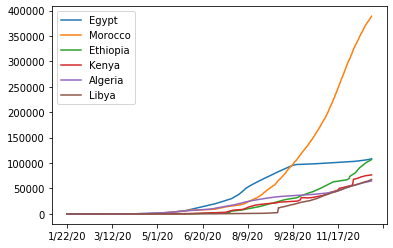

In [79]:
recoveries_df_aggregated.loc ["Egypt"].plot()
recoveries_df_aggregated.loc ["Morocco"].plot()
recoveries_df_aggregated.loc ["Ethiopia"].plot()
recoveries_df_aggregated.loc ["Kenya"].plot()
recoveries_df_aggregated.loc ["Algeria"].plot()
recoveries_df_aggregated.loc ["Libya"].plot()
plt.legend()
plt.savefig('img/recoveries-africa.png')
plt.show()

### Visualizing Africa deaths cases

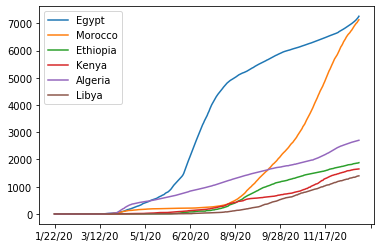

In [80]:
deaths_df_aggregated.loc ["Egypt"].plot()
deaths_df_aggregated.loc ["Morocco"].plot()
deaths_df_aggregated.loc ["Ethiopia"].plot()
deaths_df_aggregated.loc ["Kenya"].plot()
deaths_df_aggregated.loc ["Algeria"].plot()
deaths_df_aggregated.loc ["Libya"].plot()
plt.legend()
plt.savefig('img/deaths-africa.png')
plt.show()

### Visualizing North America confirmed cases

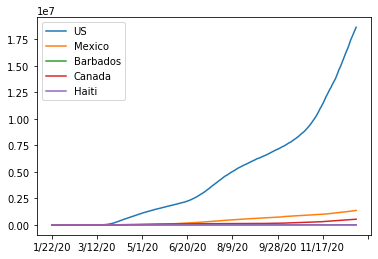

In [81]:
confirmed_df_aggregated.loc ["US"].plot()
confirmed_df_aggregated.loc ["Mexico"].plot()
confirmed_df_aggregated.loc ["Barbados"].plot()
confirmed_df_aggregated.loc ["Canada"].plot()
confirmed_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/confirmed-northamerica.png')
plt.show()

### Visualizing North America recoveries cases

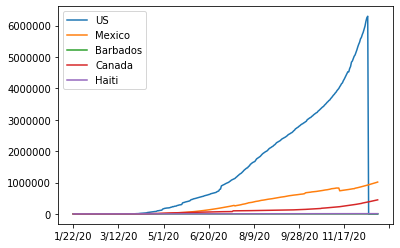

In [82]:
recoveries_df_aggregated.loc ["US"].plot()
recoveries_df_aggregated.loc ["Mexico"].plot()
recoveries_df_aggregated.loc ["Barbados"].plot()
recoveries_df_aggregated.loc ["Canada"].plot()
recoveries_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/recoveries-northamerica.png')
plt.show()

### Visualizing North America deaths cases

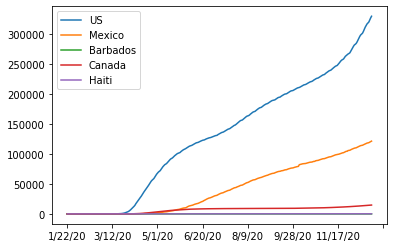

In [83]:
deaths_df_aggregated.loc ["US"].plot()
deaths_df_aggregated.loc ["Mexico"].plot()
deaths_df_aggregated.loc ["Barbados"].plot()
deaths_df_aggregated.loc ["Canada"].plot()
deaths_df_aggregated.loc ["Haiti"].plot()
plt.legend()
plt.savefig('img/deaths-northamerica.png')
plt.show()

### Visualizing South America confirmed cases

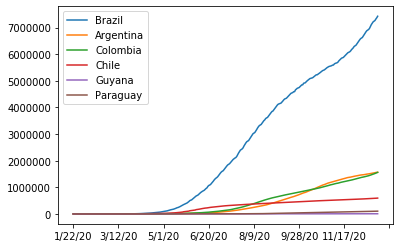

In [84]:
confirmed_df_aggregated.loc ["Brazil"].plot()
confirmed_df_aggregated.loc ["Argentina"].plot()
confirmed_df_aggregated.loc ["Colombia"].plot()
confirmed_df_aggregated.loc ["Chile"].plot()
confirmed_df_aggregated.loc ["Guyana"].plot()
confirmed_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/confirmed-southamerica.png')
plt.show()

### Visualizing South America recoveries cases

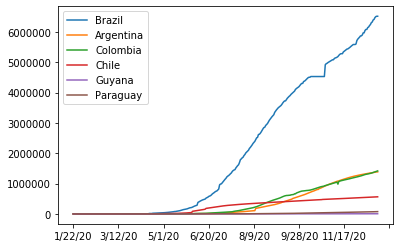

In [85]:
recoveries_df_aggregated.loc ["Brazil"].plot()
recoveries_df_aggregated.loc ["Argentina"].plot()
recoveries_df_aggregated.loc ["Colombia"].plot()
recoveries_df_aggregated.loc ["Chile"].plot()
recoveries_df_aggregated.loc ["Guyana"].plot()
recoveries_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/recoveries-southamerica.png')
plt.show()

### Visualizing South America deaths cases

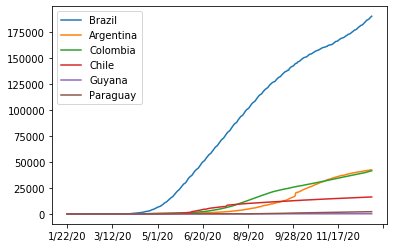

In [86]:
deaths_df_aggregated.loc ["Brazil"].plot()
deaths_df_aggregated.loc ["Argentina"].plot()
deaths_df_aggregated.loc ["Colombia"].plot()
deaths_df_aggregated.loc ["Chile"].plot()
deaths_df_aggregated.loc ["Guyana"].plot()
deaths_df_aggregated.loc ["Paraguay"].plot()
plt.legend()
plt.savefig('img/deaths-southamerica.png')
plt.show()

### Visualizing Oceania confirmed cases

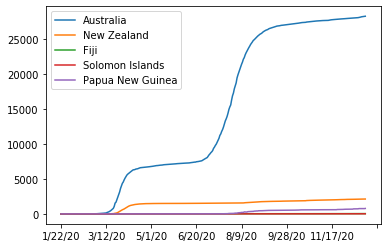

In [87]:
confirmed_df_aggregated.loc ["Australia"].plot()
confirmed_df_aggregated.loc ["New Zealand"].plot()
confirmed_df_aggregated.loc ["Fiji"].plot()
confirmed_df_aggregated.loc ["Solomon Islands"].plot()
confirmed_df_aggregated.loc ["Papua New Guinea"].plot()
plt.legend()
plt.savefig('img/confirmed-oceania.png')
plt.show()

### Visualizing Oceania recoveries cases

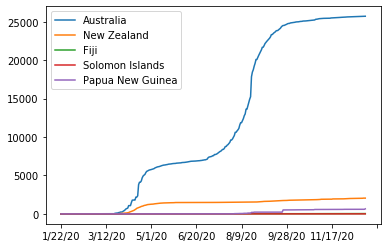

In [88]:
recoveries_df_aggregated.loc ["Australia"].plot()
recoveries_df_aggregated.loc ["New Zealand"].plot()
recoveries_df_aggregated.loc ["Fiji"].plot()
recoveries_df_aggregated.loc ["Solomon Islands"].plot()
recoveries_df_aggregated.loc ["Papua New Guinea"].plot()
plt.legend()
plt.savefig('img/recoveries-oceania.png')
plt.show()

### Visualizing Oceania deaths cases

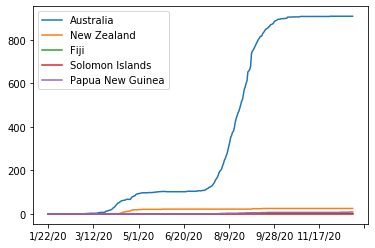

In [89]:
deaths_df_aggregated.loc ["Australia"].plot()
deaths_df_aggregated.loc ["New Zealand"].plot()
deaths_df_aggregated.loc ["Fiji"].plot()
deaths_df_aggregated.loc ["Solomon Islands"].plot()
deaths_df_aggregated.loc ["Papua New Guinea"].plot()
plt.legend()
plt.savefig('img/deaths-oceania.png')
plt.show()

### Calculating a good measure describing the spread of the virus 

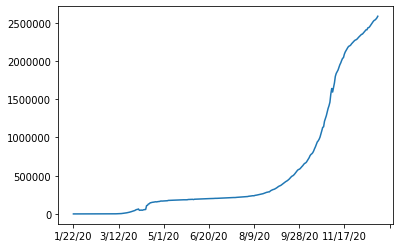

In [90]:
confirmed_df_aggregated.loc['France'].plot()

### Calculating the first derivative of the curve

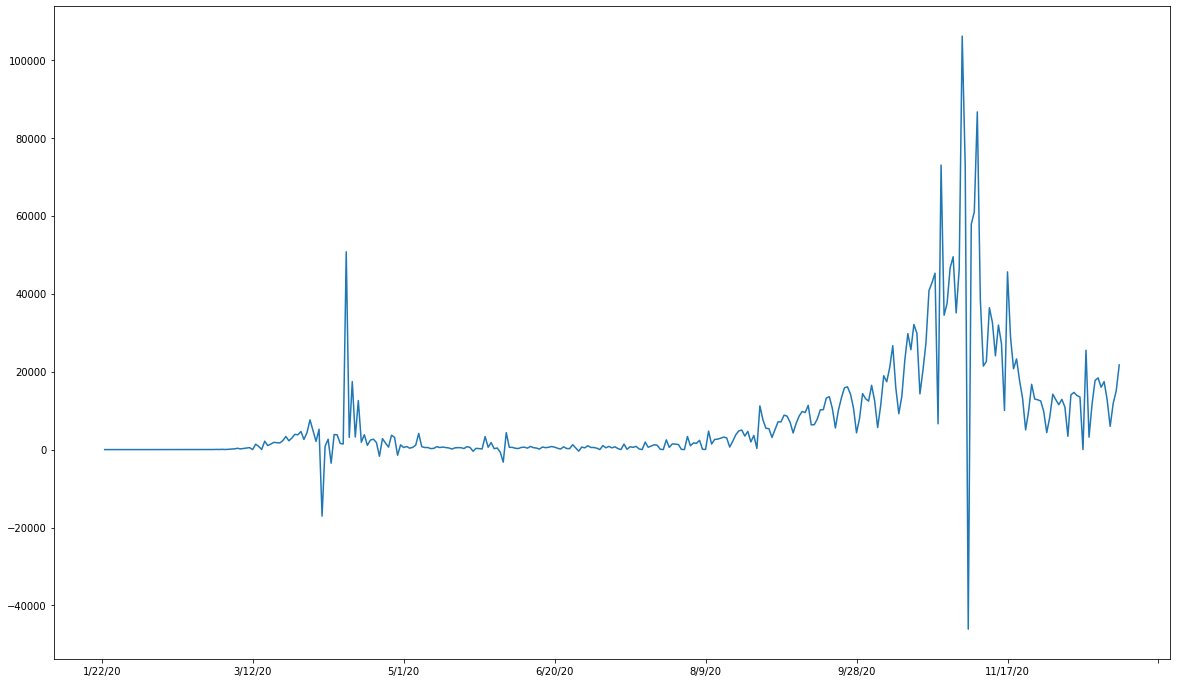

In [93]:
confirmed_df_aggregated.loc['France'].diff().plot())
plt.savefig('img/curve-fr.png')
# plot line of best fit
plt.show()

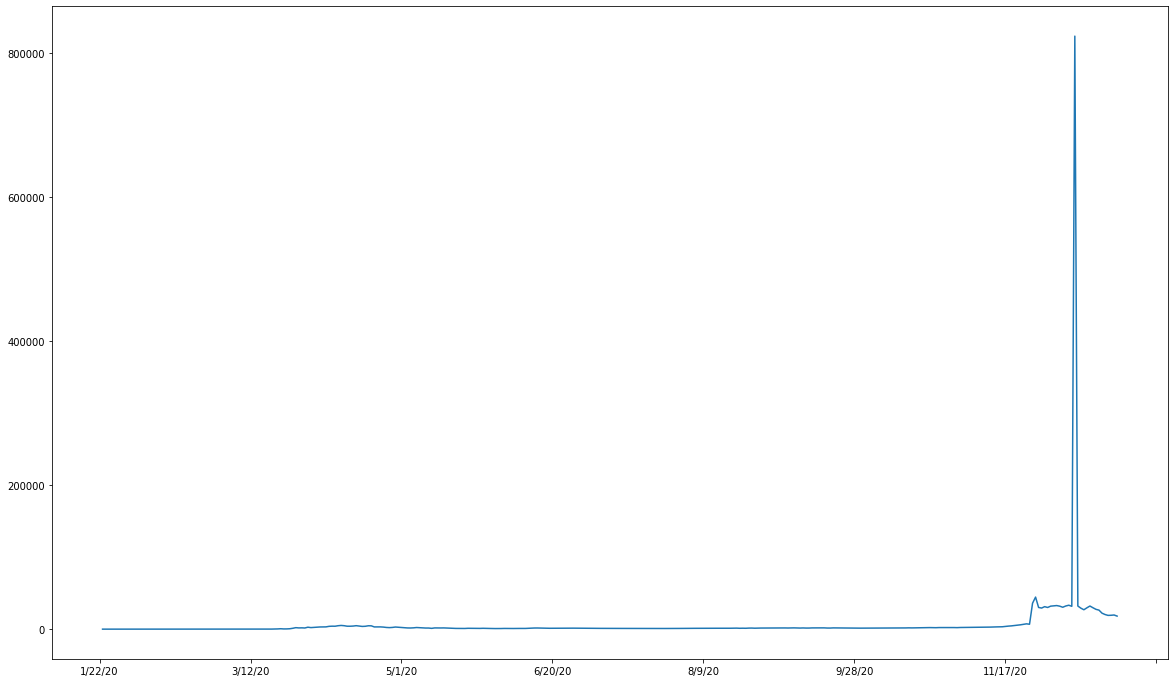

In [94]:
confirmed_df_aggregated.loc['Turkey'].diff().plot()
plt.savefig('img/curve-tr.png')
# plot line of best fit
plt.show()

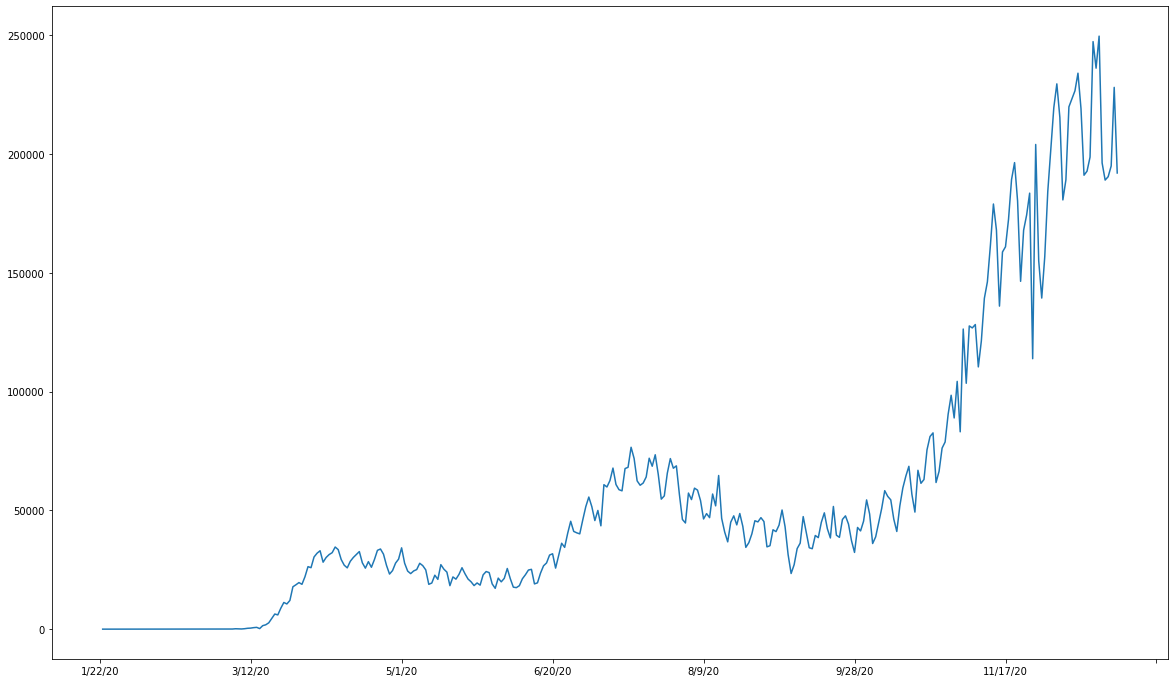

In [95]:
confirmed_df_aggregated.loc['US'].diff().plot()
plt.savefig('img/curve-us.png')

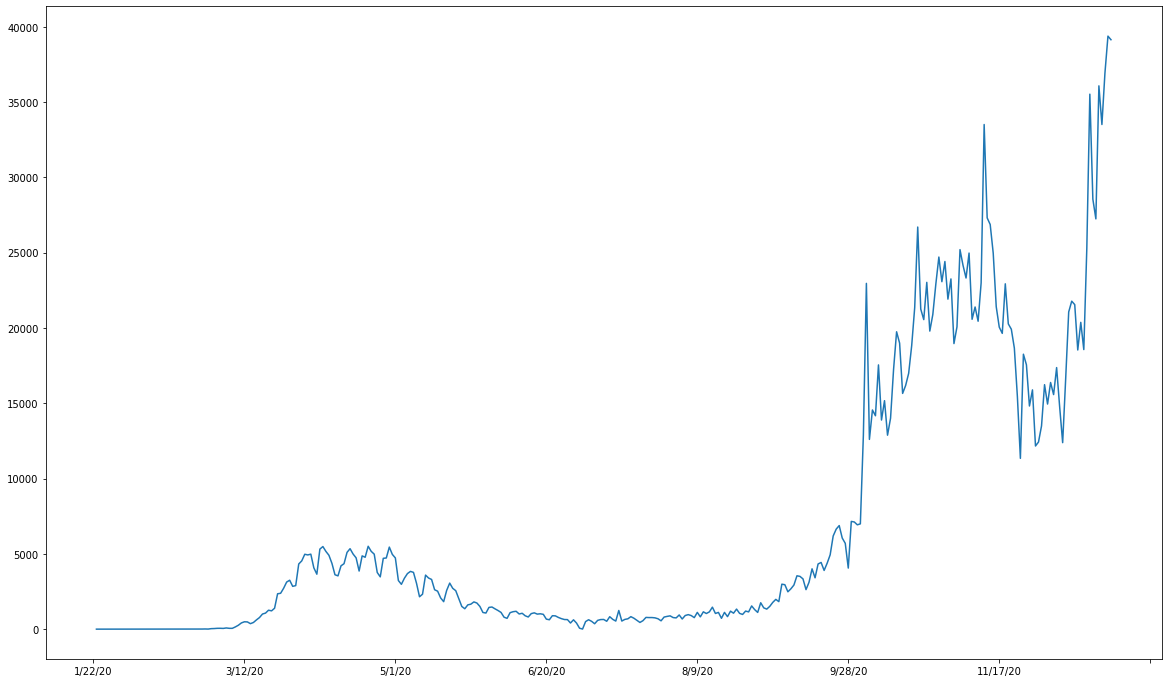

In [96]:
confirmed_df_aggregated.loc['United Kingdom'].diff().plot()
plt.savefig('img/curve-uk.png')

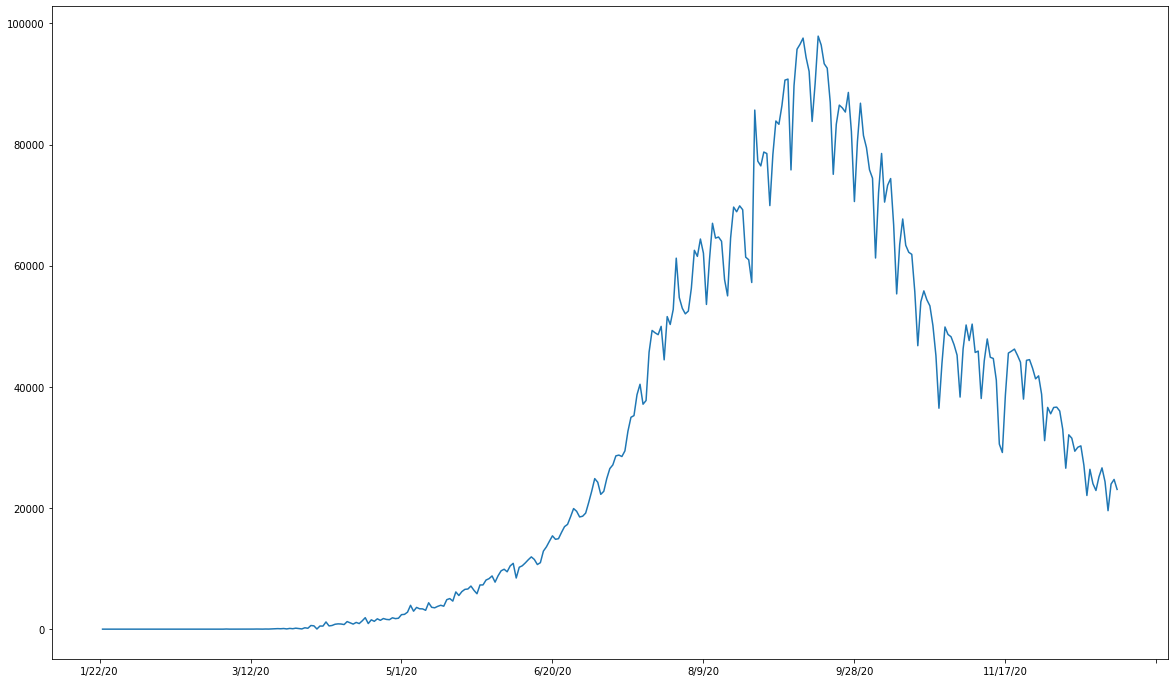

In [97]:
confirmed_df_aggregated.loc['India'].diff().plot()
plt.savefig('img/curve-in.png')

### Find maximum infection rate for France

In [98]:
confirmed_df_aggregated.loc['France'].diff().max()

106091.0

### Find maximum infection rate for all countries. 

In [99]:
countries = list(confirmed_df_aggregated.index)
max_infection_rates = []
for c in countries : 
    max_infection_rates.append(confirmed_df_aggregated.loc[c].diff().max())
confirmed_df_aggregated["max_infection_rate"] = max_infection_rates

In [100]:
confirmed_df_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,12/16/20,12/17/20,12/18/20,12/19/20,12/20/20,12/21/20,12/22/20,12/23/20,12/24/20,max_infection_rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,49161,49378,49621,49681,49817,50013,50190,50433,50655,915.0
Albania,0,0,0,0,0,0,0,0,0,0,...,50637,51424,52004,52542,53003,53425,53814,54317,54827,879.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,93507,93933,94371,94781,95203,95659,96069,96549,97007,1133.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,7446,7466,7519,7560,7577,7602,7633,7669,7699,299.0
Angola,0,0,0,0,0,0,0,0,0,0,...,16407,16484,16562,16626,16644,16686,16802,16931,17029,355.0


### Create a new dataframe with maximum infection rate

In [101]:
confirmed_data=pd.DataFrame(confirmed_df_aggregated["max_infection_rate"])

In [102]:
max_infection=confirmed_data.sort_values('max_infection_rate', ascending=False).head()
max_infection

,max_infection_rate
Country/Region,
Turkey,823225.0
US,249709.0
France,106091.0
India,97894.0
Brazil,70574.0


In [103]:
max_infection=confirmed_data.sort_values('max_infection_rate', ascending=True).tail(20)

In [119]:
fig = px.bar(max_infection, x='max_infection_rate',y=max_infection.index,title='Countries with maximum infection rate', color='max_infection_rate', orientation='h')
fig.write_image("img/Countries-infection-rate.png")
fig.show()

# Visualizing Global Dataset

In [105]:
### Import libraries
import pandas as pd # primary data structure library
import numpy as np # useful for many scientific computing in Python
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches # needed for waffle Charts
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.express as px
import random
import math
import time
import datetime
from PIL import Image # converting images into arrays
import matplotlib.patches as mpatches # needed for waffle Charts
import folium # to create maps
from pylab import *
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Downloading Data 

In [106]:
### Select yesterday date as report provide figures for the day before
from datetime import date, timedelta
file_date = str((date.today() - timedelta(days = 1)).strftime('%m-%d-%Y'))
### Select data path
github_dir_path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'
file_path = github_dir_path  + file_date + '.csv'
### Import data
df = pd.read_csv(file_path, error_bad_lines=False)

# Exploring Data

In [107]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-12-25 05:22:48,33.93911,67.709953,50655,2126,40359,8170.0,Afghanistan,130.123706,4.197019
1,NaN,NaN,NaN,Albania,2020-12-25 05:22:48,41.15330,20.168300,54827,1125,30276,23426.0,Albania,1905.170616,2.051909
2,NaN,NaN,NaN,Algeria,2020-12-25 05:22:48,28.03390,1.659600,97007,2705,64777,29525.0,Algeria,221.219368,2.788459
3,NaN,NaN,NaN,Andorra,2020-12-25 05:22:48,42.50630,1.521800,7699,83,7171,445.0,Andorra,9964.408206,1.078062
4,NaN,NaN,NaN,Angola,2020-12-25 05:22:48,-11.20270,17.873900,17029,393,9729,6907.0,Angola,51.813002,2.307828


In [108]:
print ('dataframe dimensions:', df.shape)

dataframe dimensions: (3976, 14)


# Prepping Data 

In [109]:
### Check if the dataframe contains NaN values
df.isna().any()

FIPS                    True
Admin2                  True
Province_State          True
Country_Region         False
Last_Update            False
Lat                     True
Long_                   True
Confirmed              False
Deaths                 False
Recovered              False
Active                  True
Combined_Key           False
Incident_Rate           True
Case_Fatality_Ratio     True
dtype: bool

In [110]:
# Countries affected
countries = df['Country_Region'].unique().tolist()
print("\nTotal countries affected by virus: ",len(countries))
print(countries)


Total countries affected by virus:  191
['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burma', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Diamond Princess', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras'

In [111]:
### Replace NaN values by 0
df.fillna(0, inplace=True)
### Remove columns
df_countries = df.drop(['FIPS','Lat','Long_','Admin2','Province_State','Last_Update','Combined_Key'], axis=1)
### Rename the columns so that they make sense
df_countries.rename (columns = {'Country_Region':'Country'}, inplace = True)
### Re-order Columns
df_countries = df_countries[['Country','Confirmed','Active','Recovered','Deaths']]
### Group datas by Country
df_countries_grouped=df_countries.groupby('Country').sum()
### Set the country name as index
df_countries.set_index('Country', inplace=True)

In [112]:
# view the final dataframe
df_countries_grouped.head()

,Confirmed,Active,Recovered,Deaths
Country,,,,
Afghanistan,50655,8170.0,40359,2126
Albania,54827,23426.0,30276,1125
Algeria,97007,29525.0,64777,2705
Andorra,7699,445.0,7171,83
Angola,17029,6907.0,9729,393


In [113]:
print ('data dimensions:', df_countries_grouped.shape)

data dimensions: (191, 4)


In [114]:
confirmed_sum = df.Confirmed.sum()
active_sum=df.Active.sum()
recovered_sum = df.Recovered.sum()
death_sum = df.Deaths.sum()

# Visualizing Data

In [115]:
%config InlineBackend.figure_format = 'retina'
plt.rc('figure', dpi=300)
plt.rc('savefig', dpi=300)
fig_size = (12,6)
big_fig_size = (18,8)

### Creating Dataframe with Totals

In [116]:
df_tot = pd.DataFrame(columns=['Confirmed', 'Active', 'Recovered','Deaths'])
# Append rows in Empty Dataframe by adding dictionaries
df_tot = df_tot.append({'Confirmed': confirmed_sum, 'Active': active_sum, 'Recovered': recovered_sum,'Deaths': death_sum}, ignore_index=True)

### Plot Total Cases

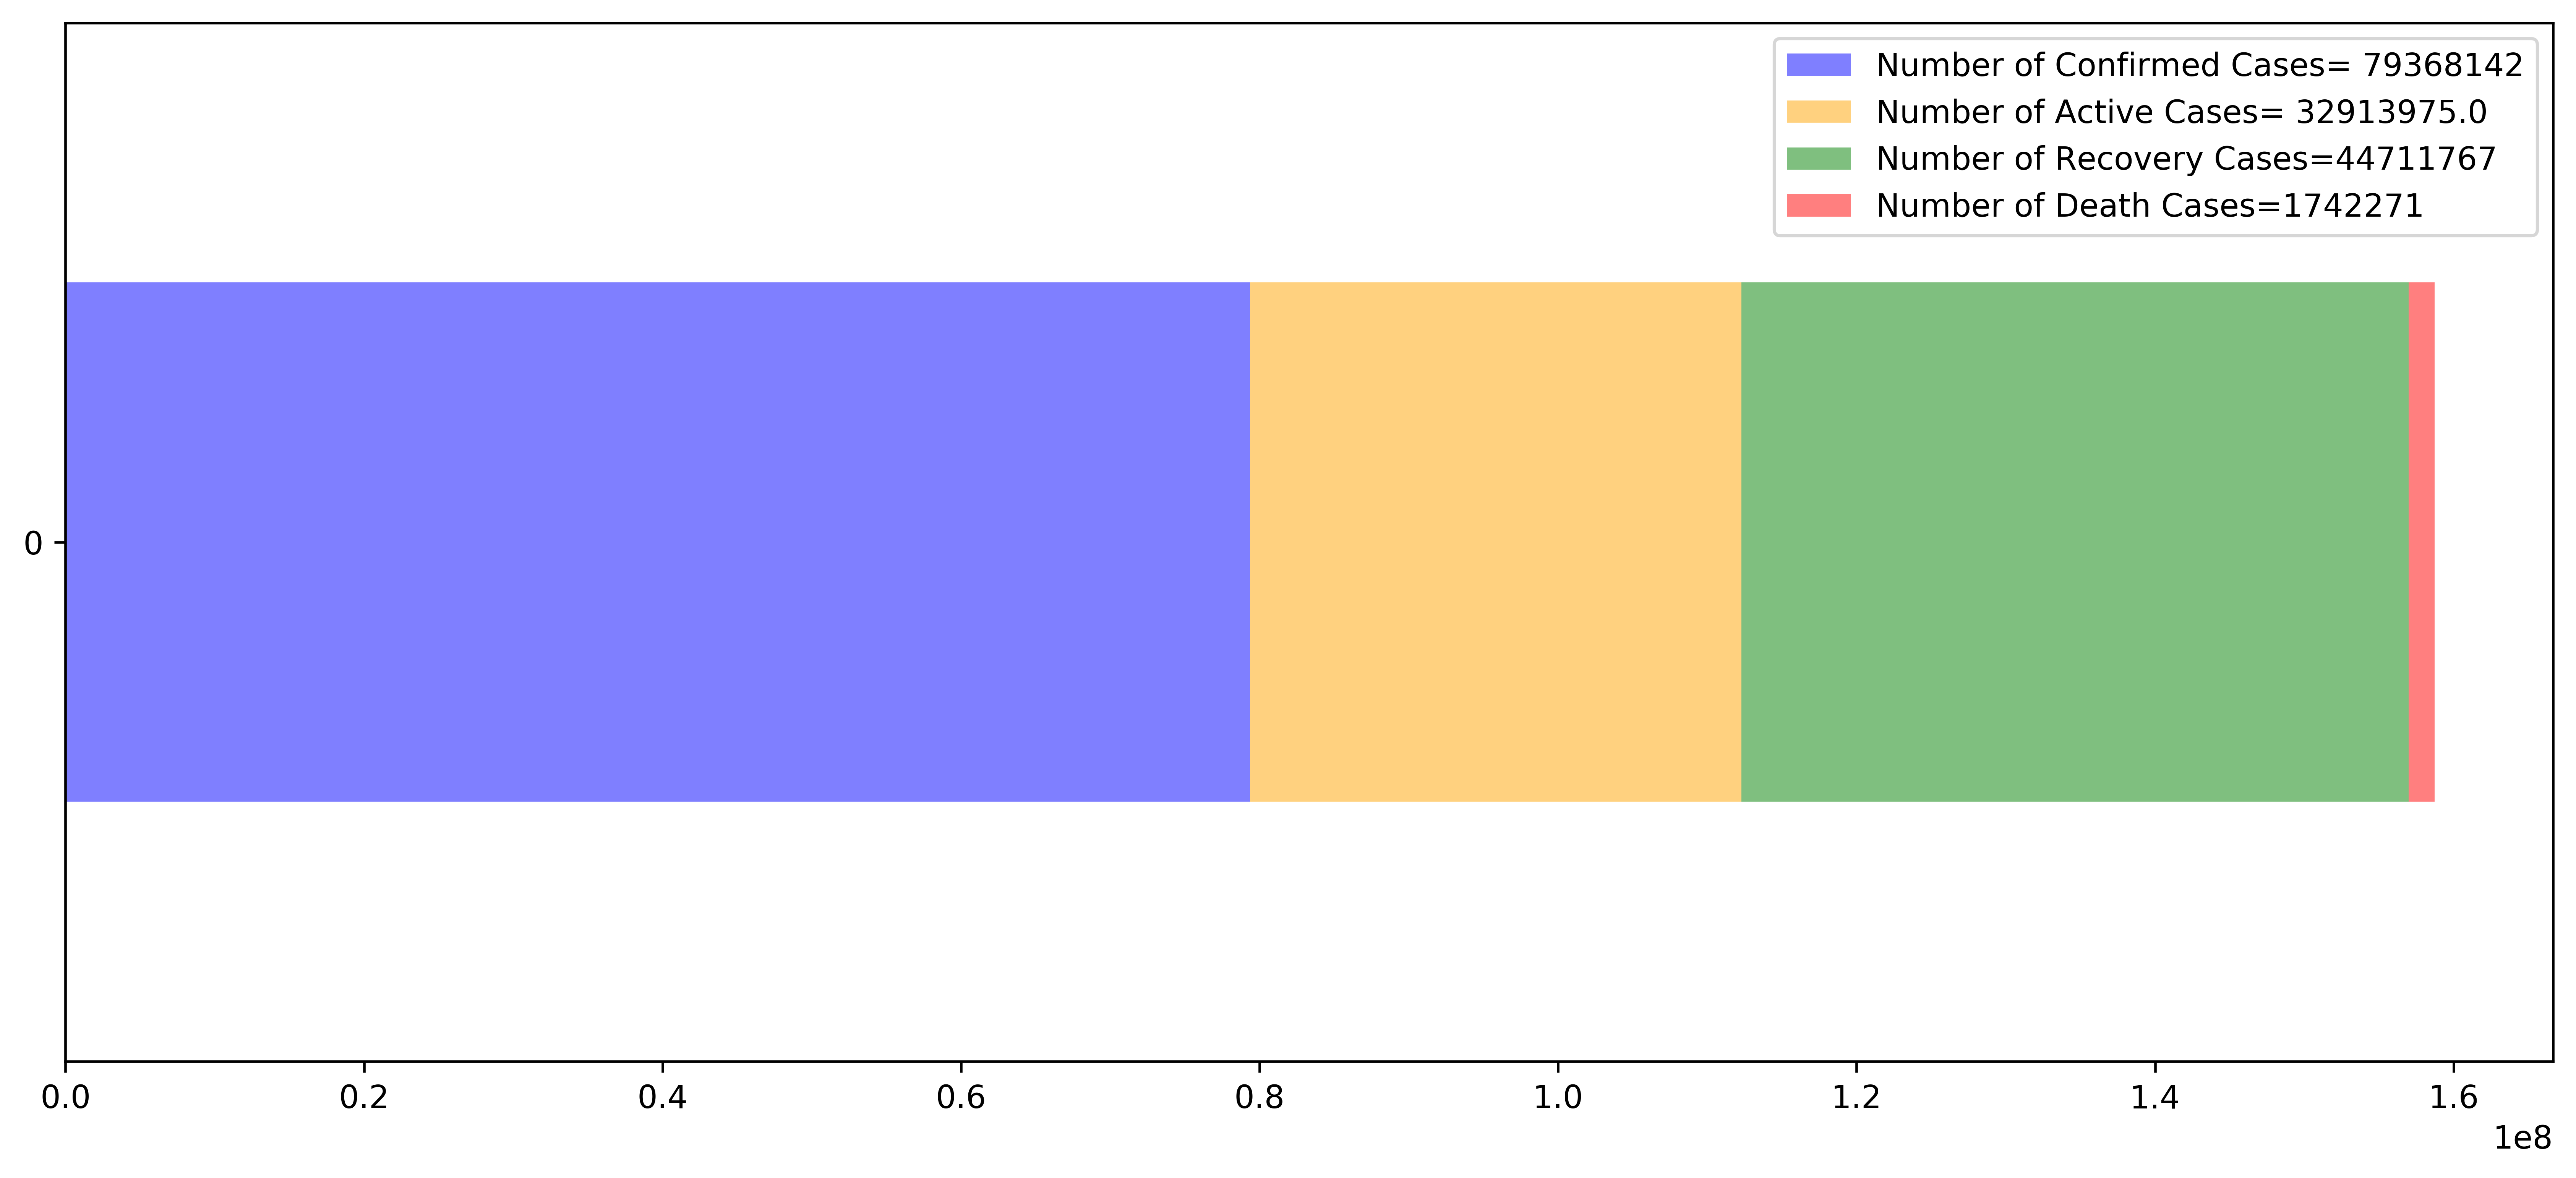

In [117]:
df_tot.plot(kind='barh', figsize=(14, 6),stacked=True, 
             alpha=0.5, 
            color=['blue', 'orange', 'green', 'red']) 
plt.legend(['Number of Confirmed Cases= '+ str(confirmed_sum), 'Number of Active Cases= '+ str(active_sum), 'Number of Recovery Cases='+ str(recovered_sum), 'Number of Death Cases='+ str(death_sum)], loc='upper right', fontsize=10)
plt.savefig('img/total-cases.png')
plt.show()

### Visualize hierarchical data using nested rectangles. 
Click on one sector to zoom in/out, which also displays a pathbar in the upper-left corner of your treemap. To zoom out you can use the path bar as well.

In [118]:
fig = px.treemap(df.sort_values(by='Confirmed', ascending=False ).reset_index(drop=True), 
                 path=["Country_Region"], values="Confirmed", 
                 title='Number of Confirmed Cases',color='Confirmed')
plt.savefig('img/treemap.png')
fig.show()

<Figure size 1800x1200 with 0 Axes>